### Importing Libraries

In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

### Data Preprocessing

In [7]:
df = pd.read_csv("Kaggle Breast cancer Dataset.csv")

print(df.head)

<bound method NDFrame.head of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0  

In [22]:
print(df.info)

<bound method DataFrame.info of            id  diagnosis  radius_mean  texture_mean  perimeter_mean  \
0      842302          1        17.99         10.38          122.80   
1      842517          1        20.57         17.77          132.90   
2    84300903          1        19.69         21.25          130.00   
3    84348301          1        11.42         20.38           77.58   
4    84358402          1        20.29         14.34          135.10   
..        ...        ...          ...           ...             ...   
564    926424          1        21.56         22.39          142.00   
565    926682          1        20.13         28.25          131.20   
566    926954          1        16.60         28.08          108.30   
567    927241          1        20.60         29.33          140.10   
568     92751          0         7.76         24.54           47.92   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
0       1001.0          0.11840           0.27

In [10]:
df.drop(['Unnamed: 32', 'id'], axis = 1)

print(df.shape)

def daignosis_value(diagnosis):
    if diagnosis == "M":
        return 1
    else:
        return 0

df['diagnosis'] = df['diagnosis'].apply(daignosis_value)

(569, 33)


### Visualizing the data

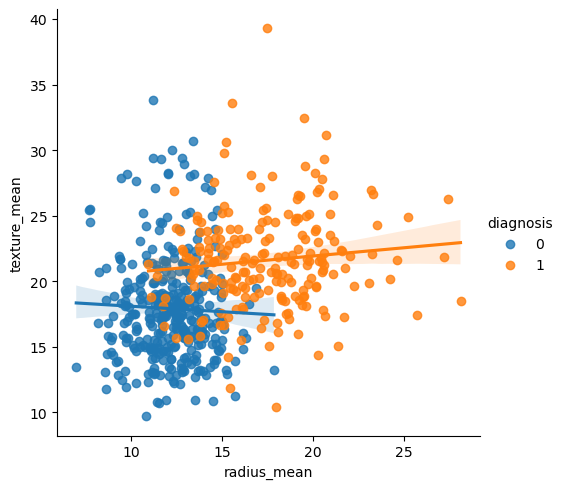

In [14]:
import seaborn as sns
sns.lmplot(x = 'radius_mean', y = 'texture_mean', hue = 'diagnosis', data = df)

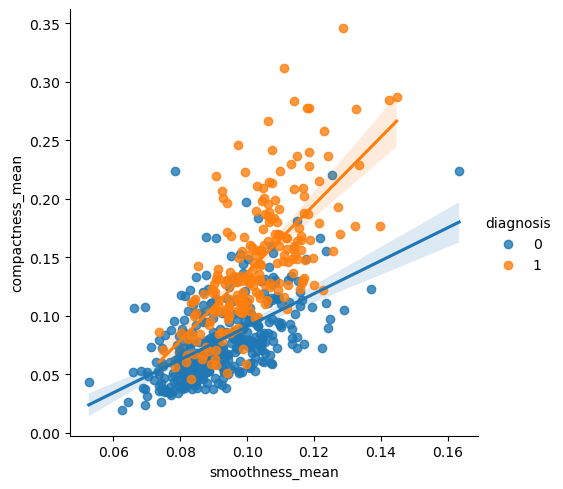

In [15]:
sns.lmplot(x ='smoothness_mean', y = 'compactness_mean', data = df, hue = 'diagnosis') 

### Splitting the Dataset into Training and Testing

In [20]:
X = np.array(df.iloc[:, 1:])
y = np.array(df['diagnosis'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean') 
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test) 


knn = KNeighborsClassifier(n_neighbors = 13)
knn.fit(X_train, y_train)

c:\Users\bhara\anaconda3\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: [31]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
c:\Users\bhara\anaconda3\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: [31]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


KNeighborsClassifier(n_neighbors=13)

In [24]:
knn.score(X_test, y_test)

0.9627659574468085